# **UNICEF Consultancy Assessment**
**Objective**: Calculate population-weighted coverage for antenatal care (ANC4) and skilled birth attendance (SBA) for countries categorized as on-track and off-track in under-five mortality goals (2018–2022).

This analysis was completed as part of a Learning and Skills Data Analyst Consultant – Req. #581598 positions. All results are reproducible and code is documented below.


## 1. Load Required Libraries
We begin by loading necessary Python libraries for data handling, visualization, and Excel file manipulation.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load Raw Datasets

We import:
- ANC4 and SBA coverage estimates from UNICEF
- Under-five mortality classification (on-track/off-track)
- Projected births for 2022 from UN WPP data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx to WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx
Saving On-track and off-track countries.xlsx to On-track and off-track countries.xlsx
Saving fusion_GLOBAL_DATAFLOW_UNICEF_1.0_.MNCH_ANC4+MNCH_SAB..csv to fusion_GLOBAL_DATAFLOW_UNICEF_1.0_.MNCH_ANC4+MNCH_SAB..csv


In [5]:
# Load UNICEF service coverage data (ANC4 & SBA)
df_services = pd.read_csv("fusion_GLOBAL_DATAFLOW_UNICEF_1.0_.MNCH_ANC4+MNCH_SAB..csv")

# Load UN population data
df_pop = pd.read_excel("WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx", sheet_name="Estimates")

# Load country track status (on-track / off-track)
df_status = pd.read_excel("On-track and off-track countries.xlsx")


In [6]:
df_services.head()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SDGRC_ECA_CA: (SDGRC) Central Africa,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2018,54.0,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,NaN,NaN,NaN,Population weighted averages calculated by UNI...,NaN,NaN,EOF: End of fieldwork,NaN,2000-2023,Y15T49: 15 to 49 years old
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SDGRC_ECA_CA: (SDGRC) Central Africa,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2019,54.6,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,NaN,NaN,NaN,Population weighted averages calculated by UNI...,NaN,NaN,EOF: End of fieldwork,NaN,2000-2023,Y15T49: 15 to 49 years old
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SDGRC_ECA_CA: (SDGRC) Central Africa,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2020,55.3,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,NaN,NaN,NaN,Population weighted averages calculated by UNI...,NaN,NaN,EOF: End of fieldwork,NaN,2000-2023,Y15T49: 15 to 49 years old
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SDGRC_ECA_CA: (SDGRC) Central Africa,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2021,55.9,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,NaN,NaN,NaN,Population weighted averages calculated by UNI...,NaN,NaN,EOF: End of fieldwork,NaN,2000-2023,Y15T49: 15 to 49 years old
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SDGRC_ECA_CA: (SDGRC) Central Africa,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2022,56.6,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,NaN,NaN,NaN,Population weighted averages calculated by UNI...,NaN,NaN,EOF: End of fieldwork,NaN,2000-2023,Y15T49: 15 to 49 years old


In [7]:
df_pop.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_status.head()

,ISO3Code,OfficialName,Status.U5MR
0,AFG,Afghanistan,Acceleration Needed
1,AGO,Angola,Acceleration Needed
2,AIA,Anguilla,Achieved
3,ALB,Albania,Achieved
4,AND,Andorra,Achieved


## 3. Preprocessing and Cleaning

Steps:
- Filter ANC4 and SBA for years 2018–2022
- Keep most recent data per country
- Standardize country names or codes
- Merge datasets using common identifiers


In [9]:
# Keep only ANC4 and SBA indicators
relevant_indicators = [
    'MNCH_ANC4: Antenatal care 4+ visits - percentage of women (aged 15-49 years) attended at least four times during pregnancy by any provider',
    'MNCH_SAB: Skilled birth attendant - percentage of deliveries attended by skilled health personnel'
]

df_filtered = df_services[df_services['INDICATOR:Indicator'].isin(relevant_indicators)]

In [10]:
# Step 2: Filter for years between 2018 and 2022 (from 'TIME_PERIOD')
df_filtered = df_filtered[df_filtered['TIME_PERIOD:Time period'].between(2018, 2022)]

In [11]:
# Add a clean country name column
df_filtered['country'] = df_filtered['REF_AREA:Geographic area'].str.extract(r'^(\w+):')


In [12]:
# Sort to keep the latest year per Country+Indicator
df_latest = df_filtered.sort_values(
    ['country', 'INDICATOR:Indicator', 'TIME_PERIOD:Time period'],
    ascending=[True, True, False]
).drop_duplicates(
    subset=['country', 'INDICATOR:Indicator'],
    keep='first'
)

In [13]:
df_latest = df_latest.rename(columns={
    'country': 'Country',
    'INDICATOR:Indicator': 'Indicator',
    'OBS_VALUE:Observation Value': 'Value',
    'TIME_PERIOD:Time period': 'Year'
})

In [14]:
#Reset index and preview
df_latest.reset_index(drop=True, inplace=True)
df_latest.head(10)

,DATAFLOW,REF_AREA:Geographic area,Indicator,SEX:Sex,Year,Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age,Country
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2020,27.6,0: Units,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,Afghanistan 2019-2020 Income; Expenditure & La...,NaN,NaN,EOF: End of fieldwork,NaN,2010-2023,Y15T49: 15 to 49 years old,AFG
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,MNCH_SAB: Skilled birth attendant - percentage...,_T: Total,2020,61.8,0: Units,PCNT: %,RP: Reported,F: Free,...,Cadres included align with the standard defini...,NaN,Afghanistan 2019-2020 Income; Expenditure & La...,Joint UNICEF-WHO Database on Skilled Birth Att...,NaN,EOF: End of fieldwork,NaN,2003-2023,Y15T49: 15 to 49 years old,AFG
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AIA: Anguilla,MNCH_SAB: Skilled birth attendant - percentage...,_T: Total,2020,100.0,0: Units,PCNT: %,RP: Reported,F: Free,...,Unclear definition of the cadres included (Tra...,NaN,PLISA Health Information Platform. Indicator p...,Joint UNICEF-WHO Database on Skilled Birth Att...,NaN,EOF: End of fieldwork,NaN,2010-2020,Y15T49: 15 to 49 years old,AIA
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ALB: Albania,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2018,77.8,0: Units,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,Demographic and Health Survey 2017-2018,NaN,NaN,EOF: End of fieldwork,NaN,2002-2018,Y15T49: 15 to 49 years old,ALB
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ALB: Albania,MNCH_SAB: Skilled birth attendant - percentage...,_T: Total,2022,100.0,0: Units,PCNT: %,RP: Reported,F: Free,...,Unclear definition of the cadres included (ski...,NaN,Institute of Statistics; Men and Women 2023,Joint UNICEF-WHO Database on Skilled Birth Att...,NaN,EOF: End of fieldwork,NaN,2000-2022,Y15T49: 15 to 49 years old,ALB
5,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ARE: United Arab Emirates,MNCH_SAB: Skilled birth attendant - percentage...,_T: Total,2022,99.9,0: Units,PCNT: %,RP: Reported,F: Free,...,Institutional Birth (IB): includes all deliver...,NaN,Ministry of Health and Prevention,Joint UNICEF-WHO Database on Skilled Birth Att...,NaN,EOF: End of fieldwork,NaN,2004-2022,Y15T49: 15 to 49 years old,ARE
6,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ARG: Argentina,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2020,90.4,0: Units,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,Multiple Indicator Cluster Survey 2019-2020,NaN,NaN,EOF: End of fieldwork,NaN,2005-2020,Y15T49: 15 to 49 years old,ARG
7,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ARG: Argentina,MNCH_SAB: Skilled birth attendant - percentage...,_T: Total,2020,98.8,0: Units,PCNT: %,RP: Reported,F: Free,...,Cadres included align with the standard defini...,NaN,Encuesta Nacional de Niñas; Niños y Adolescent...,Joint UNICEF-WHO Database on Skilled Birth Att...,NaN,EOF: End of fieldwork,NaN,2000-2020,Y15T49: 15 to 49 years old,ARG
8,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ATG: Antigua and Barbuda,MNCH_SAB: Skilled birth attendant - percentage...,_T: Total,2020,99.0,0: Units,PCNT: %,RP: Reported,F: Free,...,Unclear definition of the cadres included (Tra...,NaN,PLISA Health Information Platform. Indicator p...,Joint UNICEF-WHO Database on Skilled Birth Att...,NaN,EOF: End of fieldwork,NaN,2000-2020,Y15T49: 15 to 49 years old,ATG
9,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AUREC_AMU: Arab Maghreb Union (AMU),MNCH_ANC4: Antenata

In [16]:
df_services_filtered = df_latest[
    df_latest['Indicator'].isin([
        'MNCH_ANC4: Antenatal care 4+ visits - percentage of women (aged 15-49 years) attended at least four times during pregnancy by any provider',
        'MNCH_SAB: Skilled birth attendant - percentage of deliveries attended by skilled health personnel'
    ])
]

df_services_filtered[['Country', 'Indicator', 'Year', 'Value']].head(10)

,Country,Indicator,Year,Value
0,AFG,MNCH_ANC4: Antenatal care 4+ visits - percenta...,2020,27.6
1,AFG,MNCH_SAB: Skilled birth attendant - percentage...,2020,61.8
2,AIA,MNCH_SAB: Skilled birth attendant - percentage...,2020,100.0
3,ALB,MNCH_ANC4: Antenatal care 4+ visits - percenta...,2018,77.8
4,ALB,MNCH_SAB: Skilled birth attendant - percentage...,2022,100.0
5,ARE,MNCH_SAB: Skilled birth attendant - percentage...,2022,99.9
6,ARG,MNCH_ANC4: Antenatal care 4+ visits - percenta...,2020,90.4
7,ARG,MNCH_SAB: Skilled birth attendant - percentage...,2020,98.8
8,ATG,MNCH_SAB: Skilled birth attendant - percentage...,2020,99.0
9,AUREC_AMU,MNCH_ANC4: Antenatal care 4+ visits - percenta...,2022,70.6


In [17]:
# Set the correct header row (row 15) and skip the rows before it for WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1
df_pop.columns = df_pop.iloc[15]
df_pop = df_pop.iloc[16:].reset_index(drop=True)

In [18]:
# Clean column names by removing "Unnamed:" prefixes and extra spaces
df_pop.columns = [col.split(':')[0].strip() if 'Unnamed:' not in str(col) else col for col in df_pop.columns]

# Drop columns that are entirely NaN
df_pop = df_pop.dropna(axis=1, how='all')

# Preview the cleaned DataFrame
df_pop.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,580.75,498.04,240.316,271.625,208.192,378.697,430.259,324.931,0,0
1,2,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,566.728,490.199,231.177,258.09,203.78,368.319,415.836,319.336,0,0
2,3,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,546.317,477.264,218.674,240.034,197.142,353.055,395.533,309.91,0,0
3,4,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,535.829,469.532,212.872,232.602,193.049,345.083,385.843,303.905,0,0
4,5,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,523.124,458.484,205.762,224.05,187.444,335.442,374.658,295.994,0,0


In [19]:
# Map on-track vs. off-track status
df_status['track_status'] = df_status['Status.U5MR'].str.lower().map({
    'achieved': 'on-track',
    'on-track': 'on-track',
    'acceleration needed': 'off-track'
})


## 4. Merge and Prepare Data

We merge all datasets into one table for analysis and align all countries using their ISO codes or names.


In [20]:
# Merge with filtered services data
df_merged = df_services_filtered.merge(
    df_status[['ISO3Code', 'track_status']],
    left_on='Country',
    right_on='ISO3Code',
    how='left'
)

In [21]:
# Keep only years 2018–2022
df_merged = df_merged[df_merged['Year'].between(2018, 2022)]

# Keep the latest year for each Country & Indicator
df_latest_per_country = df_merged.sort_values('Year').groupby(['Country', 'Indicator']).tail(1)

In [22]:
print(df_pop.columns.tolist())

['Index', 'Variant', 'Region, subregion, country or area *', 'Notes', 'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code', 'SDMX code**', 'Type', 'Parent code', 'Year', 'Total Population, as of 1 January (thousands)', 'Total Population, as of 1 July (thousands)', 'Male Population, as of 1 July (thousands)', 'Female Population, as of 1 July (thousands)', 'Population Density, as of 1 July (persons per square km)', 'Population Sex Ratio, as of 1 July (males per 100 females)', 'Median Age, as of 1 July (years)', 'Natural Change, Births minus Deaths (thousands)', 'Rate of Natural Change (per 1,000 population)', 'Population Change (thousands)', 'Population Growth Rate (percentage)', 'Population Annual Doubling Time (years)', 'Births (thousands)', 'Births by women aged 15 to 19 (thousands)', 'Crude Birth Rate (births per 1,000 population)', 'Total Fertility Rate (live births per woman)', 'Net Reproduction Rate (surviving daughters per woman)', 'Mean Age Childbearing (years)', 'Sex Ratio at 

In [23]:
# Filter for the 'Estimates' variant and the year 2022
df_births_2021 = df_pop[
    (df_pop['Variant'] == 'Estimates') &
    (df_pop['Year'] == 2021)
]

In [24]:
# Select only the needed columns
df_births_2021 = df_births_2021[['ISO3 Alpha-code', 'Births (thousands)']]

In [25]:
# Rename columns for merging
df_births_2021.rename(columns={
    'ISO3 Alpha-code': 'Country',
    'Births (thousands)': 'births_2021_thousands'
}, inplace=True)

In [26]:
# Drop rows with missing values
df_births_2021 = df_births_2021.dropna(subset=['Country', 'births_2021_thousands'])

df_births_2021.head(10)

,Country,births_2021_thousands
1803,BDI,437.599
1875,COM,24.18
1947,DJI,24.541
2019,ERI,103.861
2091,ETH,3895.734
2163,KEN,1468.358
2235,MDG,895.045
2307,MWI,653.703
2379,MUS,13.437
2451,MYT,10.641


In [27]:
# Merge birth data to health coverage data by country code
df_final = df_latest_per_country.merge(
    df_births_2021,
    on='Country',
    how='left'
)


In [28]:
# Check if any countries are missing birth data after merge
missing_births = df_final['births_2021_thousands'].isna().sum()
print(f"Countries missing birth data after merge: {missing_births}")

df_final.head(10)

Countries missing birth data after merge: 160


,DATAFLOW,REF_AREA:Geographic area,Indicator,SEX:Sex,Year,Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age,Country,ISO3Code,track_status,births_2021_thousands
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ALB: Albania,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2018,77.8,0: Units,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,EOF: End of fieldwork,NaN,2002-2018,Y15T49: 15 to 49 years old,ALB,ALB,on-track,29.289
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,VEN: Venezuela (Bolivarian Republic of),MNCH_SAB: Skilled birth attendant - percentage...,_T: Total,2018,98.7,0: Units,PCNT: %,RP: Reported,F: Free,...,Joint UNICEF-WHO Database on Skilled Birth Att...,NaN,EOF: End of fieldwork,NaN,2000-2018,Y15T49: 15 to 49 years old,VEN,VEN,on-track,451.855
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,TUR: Türkiye,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2018,89.7,0: Units,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,EOF: End of fieldwork,NaN,2003-2018,Y15T49: 15 to 49 years old,TUR,TUR,on-track,1244.782
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,TUN: Tunisia,MNCH_SAB: Skilled birth attendant - percentage...,_T: Total,2018,99.5,0: Units,PCNT: %,RP: Reported,F: Free,...,Joint UNICEF-WHO Database on Skilled Birth Att...,NaN,EOF: End of fieldwork,NaN,2000-2018,Y15T49: 15 to 49 years old,TUN,TUN,on-track,197.396
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,UGA: Uganda,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2018,56.7,0: Units,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,EOF: End of fieldwork,NaN,2001-2018,Y15T49: 15 to 49 years old,UGA,UGA,off-track,1686.795
5,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,TUN: Tunisia,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2018,84.1,0: Units,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,EOF: End of fieldwork,NaN,2006-2018,Y15T49: 15 to 49 years old,TUN,TUN,on-track,197.396
6,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,CMR: Cameroon,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2018,64.9,0: Units,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,EOF: End of fieldwork,NaN,2004-2018,Y15T49: 15 to 49 years old,CMR,CMR,off-track,950.546
7,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SUR: Suriname,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2018,67.5,0: Units,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,EOF: End of fieldwork,NaN,2010-2018,Y15T49: 15 to 49 years old,SUR,SUR,on-track,11.133
8,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,COD: Democratic Republic of the Congo,MNCH_ANC4: Antenatal care 4+ visits - percenta...,_T: Total,2018,42.9,0: Units,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,EOF: End of fieldwork,NaN,2007-2018,Y15T49: 15 to 49 years old,COD,COD,off-track,4034.953
9,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,COD: Democratic Republic of the Congo,MNCH_SAB: Skilled birth attendant - percentage...,_T: Total,2018,85.2,0: Units,PCNT: %,RP: Reported,F: Free,...,Joint UNICEF-WHO Database on Skilled Birth Att...,NaN,EOF: End of fieldwork,NaN,2001-2018,Y15T49: 15 to 49 years old,COD,COD,off-track,4034.953


## 5. Calculate population-weighted coverage for ANC4 and SBA separately by track status
We compute population-weighted coverage for ANC4 and SBA using projected births for 2022 as weights. This is done separately for on-track and off-track countries.


In [29]:
weighted_coverage = df_final.groupby(['track_status', 'Indicator']).apply(
    lambda x: (x['Value'] * x['births_2021_thousands']).sum() / x['births_2021_thousands'].sum()
).reset_index(name='weighted_coverage')

print(weighted_coverage)


  track_status                                          Indicator  \
0    off-track  MNCH_ANC4: Antenatal care 4+ visits - percenta...   
1    off-track  MNCH_SAB: Skilled birth attendant - percentage...   
2     on-track  MNCH_ANC4: Antenatal care 4+ visits - percenta...   
3     on-track  MNCH_SAB: Skilled birth attendant - percentage...   

   weighted_coverage  
0          55.343638  
1          68.725589  
2          88.441684  
3          96.645006  


/tmp/ipython-input-29-1653196441.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_coverage = df_final.groupby(['track_status', 'Indicator']).apply(


In [30]:
indicator_mapping = {
    'MNCH_ANC4: Antenatal care 4+ visits - percentage of women (aged 15-49 years) attended at least four times during pregnancy by any provider': 'ANC4',
    'MNCH_SAB: Skilled birth attendant - percentage of deliveries attended by skilled health personnel': 'SBA'
}

weighted_coverage['Indicator'] = weighted_coverage['Indicator'].map(indicator_mapping)


In [31]:
coverage_pivot = weighted_coverage.pivot(index='track_status', columns='Indicator', values='weighted_coverage').reset_index()
print(coverage_pivot)


Indicator track_status       ANC4        SBA
0            off-track  55.343638  68.725589
1             on-track  88.441684  96.645006


## 6. Visualize the Results

Bar plots are created to compare population-weighted ANC4 and SBA coverage for on-track vs. off-track countries.


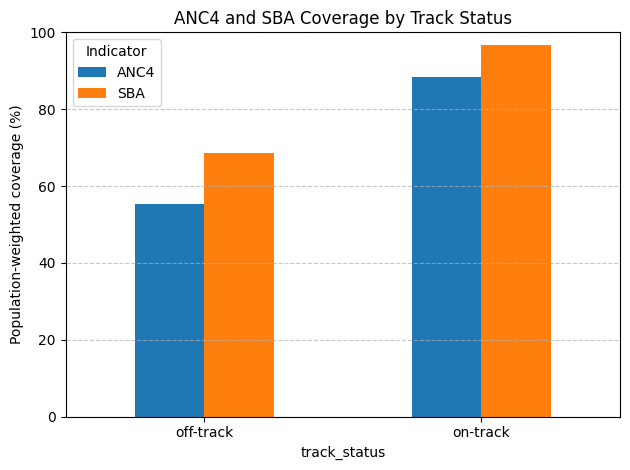

In [32]:
coverage_pivot.set_index('track_status').plot(kind='bar', rot=0)
plt.ylabel('Population-weighted coverage (%)')
plt.title('ANC4 and SBA Coverage by Track Status')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 7. Final Summary Table

In [34]:
anc4_on = 88.44
anc4_off = 55.34

sba_on = 96.65
sba_off = 68.73

# Final summary DataFrame
final_results = pd.DataFrame({
    'Status': ['On-track', 'Off-track'],
    'ANC4_Weighted_Coverage': [anc4_on, anc4_off],
    'SBA_Weighted_Coverage': [sba_on, sba_off]
})

In [35]:
import os
os.makedirs('03_output', exist_ok=True)

In [37]:
# Save as CSV in your output folder
final_results.to_csv('03_output/population_weighted_coverage.csv', index=False)

print(" Final CSV exported to 03_output/population_weighted_coverage.csv")

 Final CSV exported to 03_output/population_weighted_coverage.csv


## 8. Interpretation

On-track countries have significantly higher population-weighted ANC4 and SBA coverage compared to off-track countries. This may indicate stronger health systems and better access to maternal healthcare services.

**Assumptions**:
- Only most recent value (2018–2022) is used
- Projected births are a proxy for weighting maternal care needs
- Countries with missing data were excluded from that part of the analysis
